#  **Problem Statement :**
The Data Scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product
and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

**Main Goal :** Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

*   **Type of the Problem:** Supervised Learning Problem
*   **Target Variabe:** Item_Outlet_Sales

We will handle this problem in a structured way following the table of content given below:


1.   Problem Statement
2.   Hypothesis Generation
1.   Loading Packages and Data
2.   Data Structure and Content
1.   Exploratory Data Analysis
1.   Univariate Analysis
1.   Bivariate Analysis
2.   Missing Value Treatment
2.   Feature Engineering
2.   Encoding Categorical Variables
1.   Label Encoding
2.   One Hot Encoding
1.   Pre Processing Data
2.   Modeling
1.   Linear Regression
2.   Regularized Linear Regression
1.   Random Forest
2.   XGBoost
1.   Summary



Hypothesis Generation :

1. Store Location : Stores located in urban and developed areas should have
   higher sales because of having people with higher income levels.

2. Store Capacity : Stores which are having more capacity of space should have
   higher sales as they act like one-stop-shops and people would prefer getting everything from one place.

3. Frequency of the Product: Products with high frequency will have higher sales as they are being sold very frequently.

4. Item Visibility : The items that are more visible will have higher sales as they attract the customer first rather than other items.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import math
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from xgboost import XGBRegressor
#import optuna
import warnings
warnings.simplefilter("ignore")

import pickle

# set seed for reproductibility
np.random.seed(0)

In [ ]:
# loading the data
train = pd.read_csv("/content/Train.csv")
test  = pd.read_csv("/content/Test.csv")

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train.shape

(8523, 12)

In [ ]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
train.describe(include="all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [ ]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
train.Outlet_Establishment_Year

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [ ]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
test.shape

(5681, 11)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


# **Exploratory Data Analysis**

## Univariate Analysis

In [ ]:
numerical_cols = train.select_dtypes(include=['float64','int64']).columns.tolist()
numerical_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


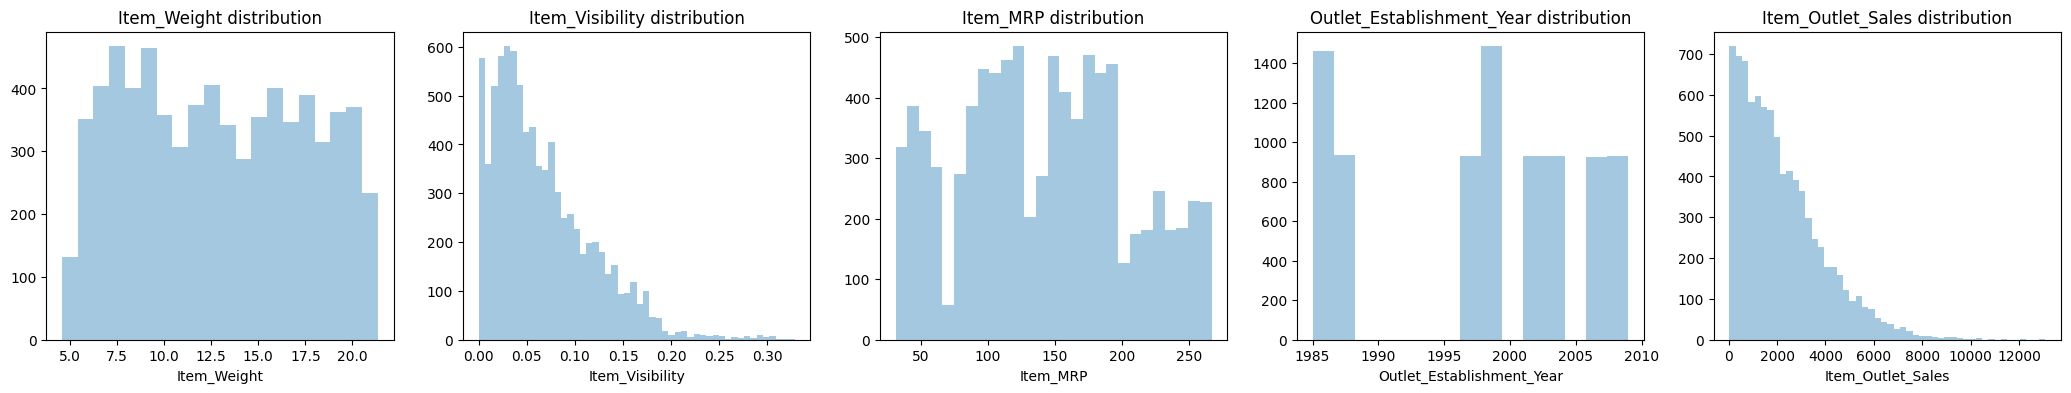

In [ ]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26, 4))

for index, col in enumerate(numerical_cols):
    sns.distplot(train[col], kde=False, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

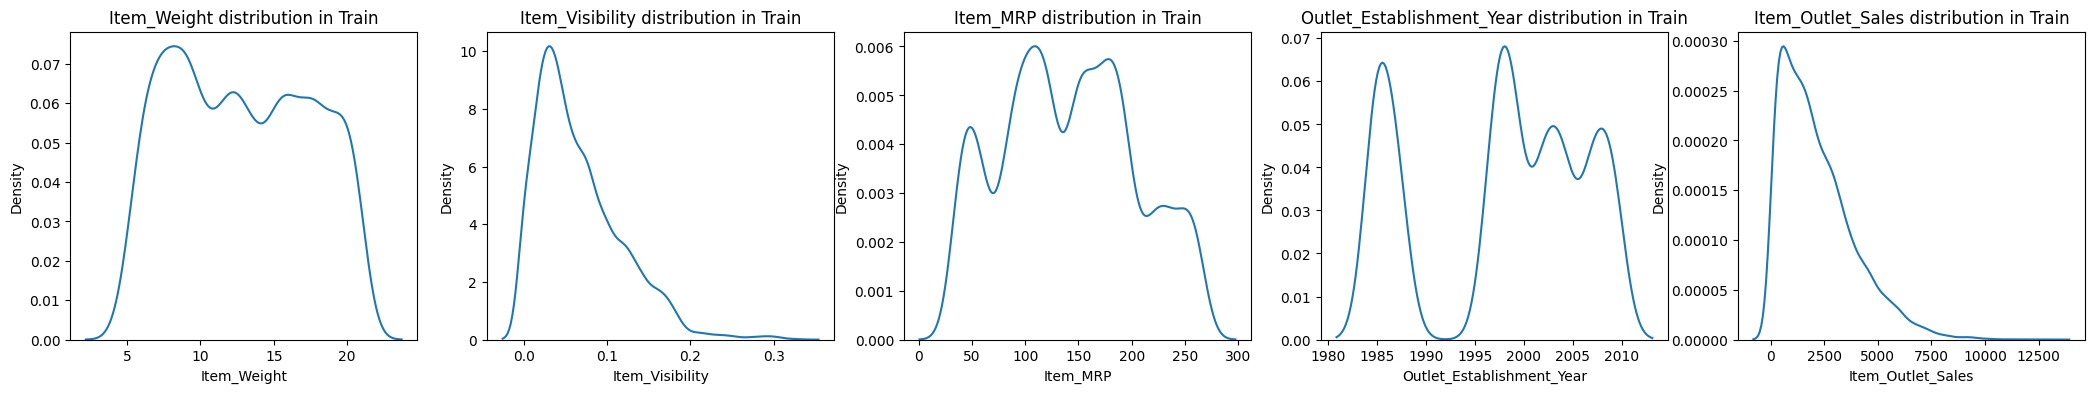

In [ ]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26, 4))

for index, col in enumerate(numerical_cols):
    sns.kdeplot(data=train, x=col, ax=ax[index])
    ax[index].set_title(f'{col} distribution in Train')

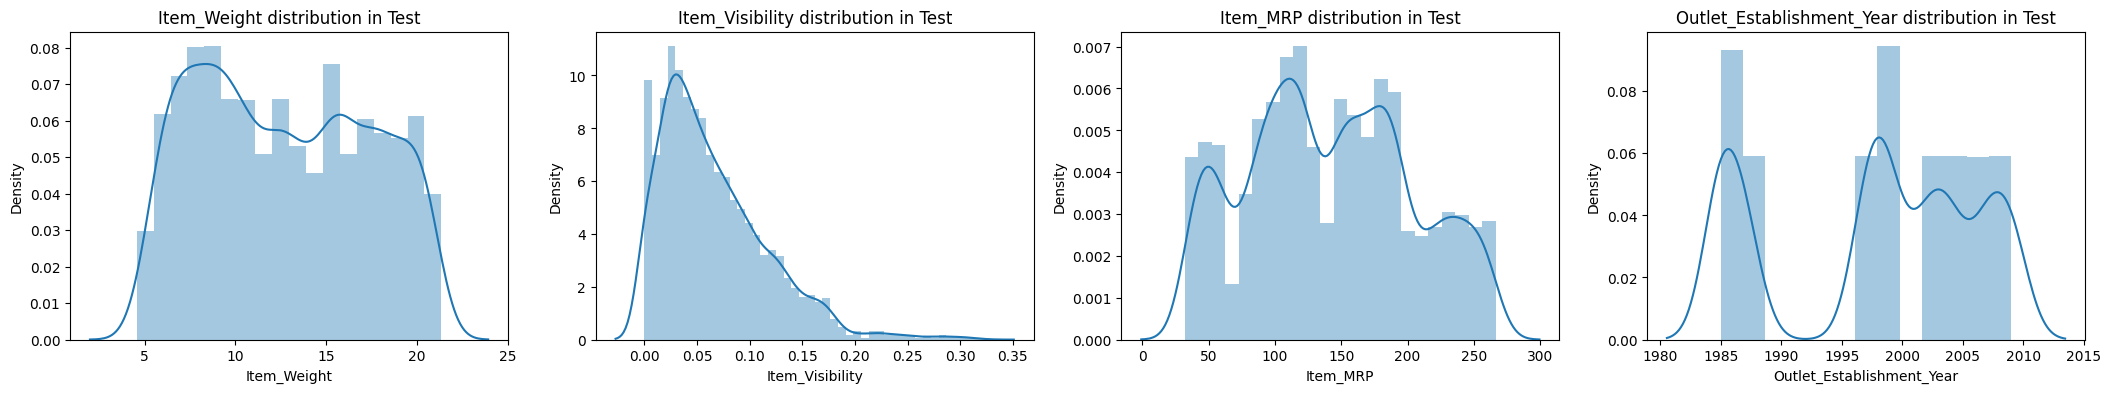

In [ ]:
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(26, 4))

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']):
    sns.distplot(test[col], kde=True, ax=ax[index])
    ax[index].set_title(f'{col} distribution in Test')

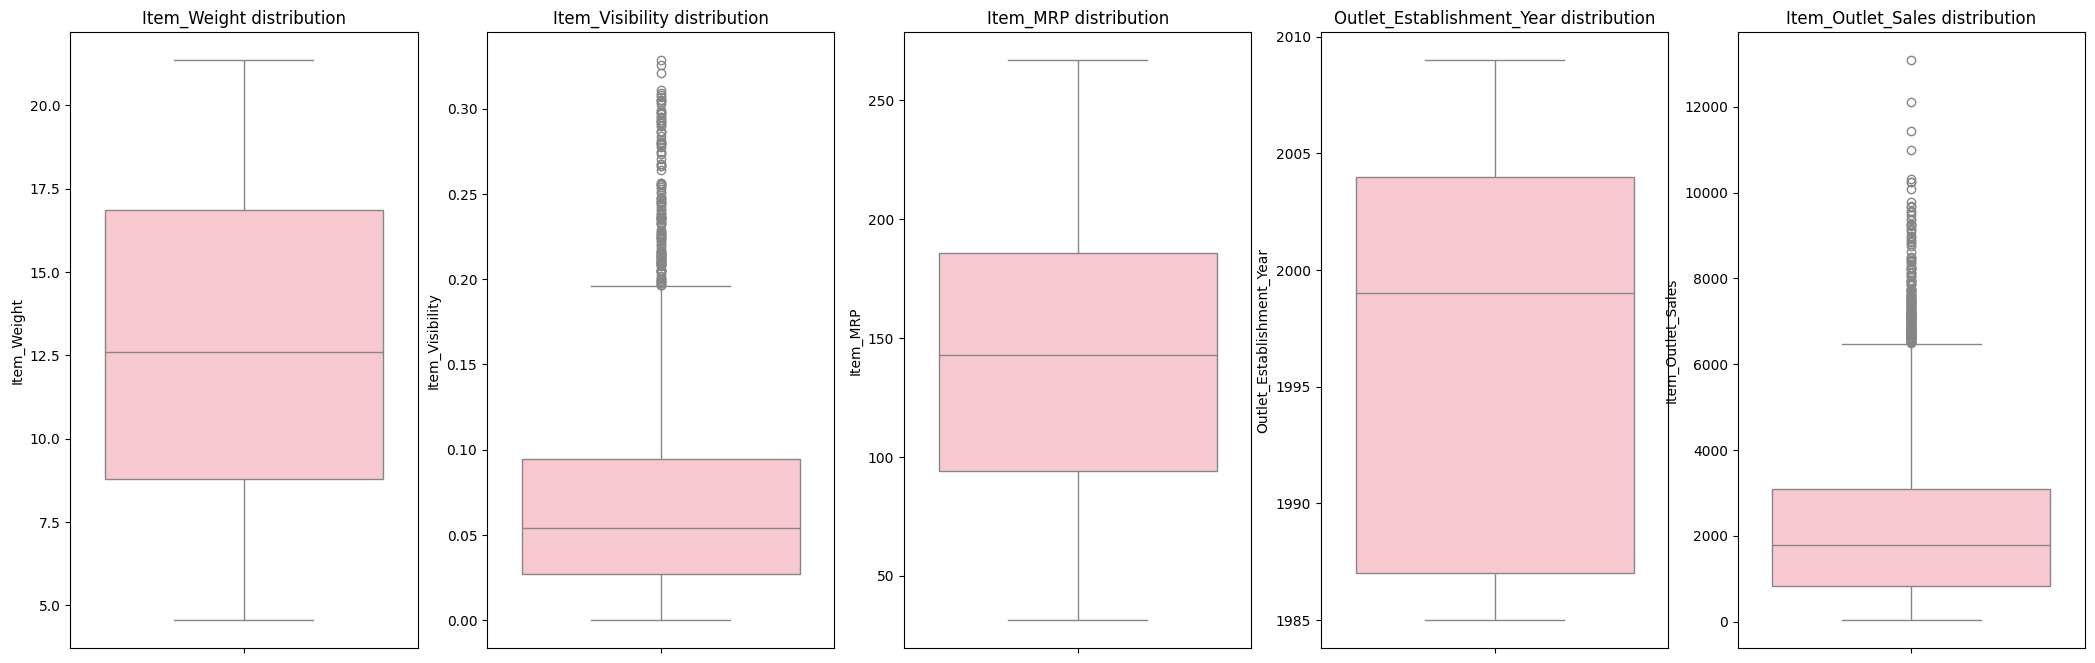

In [ ]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26,8))
for index, col in enumerate(numerical_cols):
    sns.boxplot(data=train, y=col, ax=ax[index],color='pink')
    ax[index].set_title(f'{col} distribution')

In [ ]:
categorical_cols = train.select_dtypes(include= ['object']).columns.tolist()
categorical_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
categorical_columns_to_display = [
                                 'Item_Fat_Content',
                                 'Item_Type',
                                 'Outlet_Size',
                                 'Outlet_Location_Type',
                                 'Outlet_Type'
                                ]
for col in categorical_columns_to_display:
    print(f"Number of values in the {col} column is:\n{train[col].value_counts() }")
    print("--" * 30)

Number of values in the Item_Fat_Content column is:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
------------------------------------------------------------
Number of values in the Item_Type column is:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
------------------------------------------------------------
Number of values in the Outlet_Size column is:
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
------------------------------

In [ ]:
train['Outlet_Location_Type'].unique().tolist()

['Tier 1', 'Tier 3', 'Tier 2']

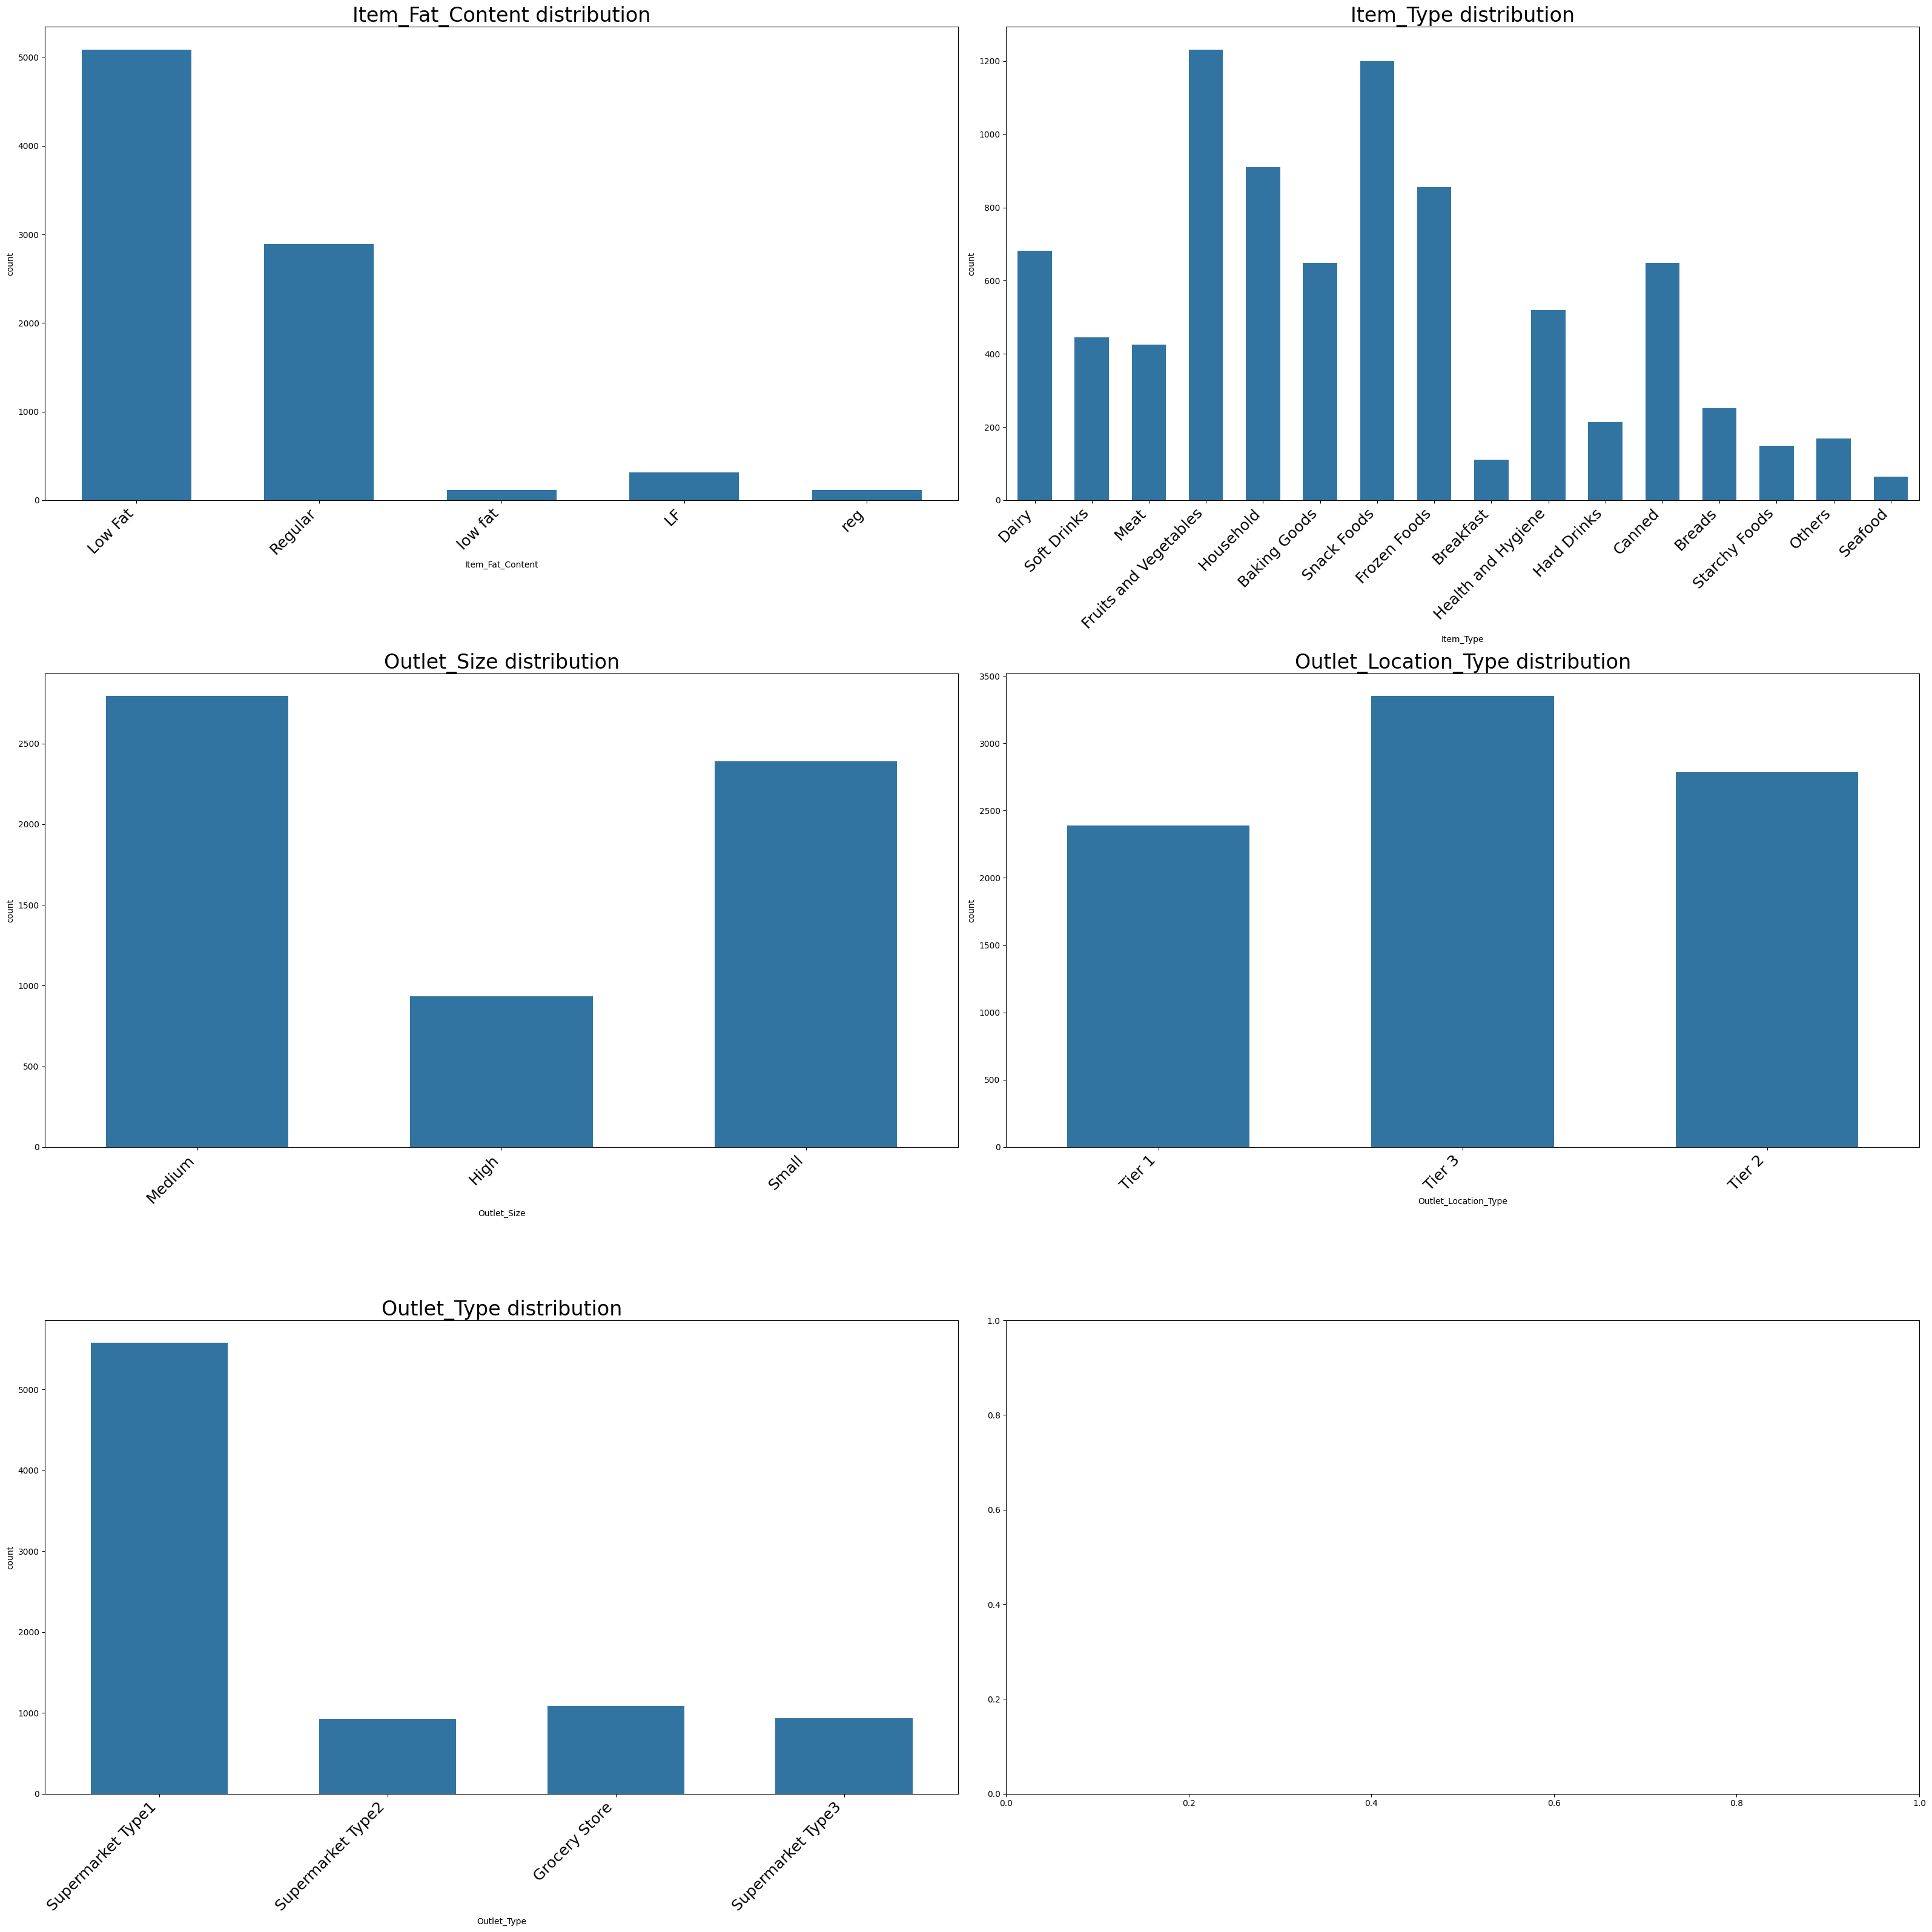

In [ ]:
_, ax = plt.subplots(nrows=3, ncols=2, figsize=(32, 32))

for index, col in enumerate(categorical_columns_to_display):
    r = index // 2
    c = index % 2
    g = sns.countplot(data=train, x=col , ax=ax[r][c], width=0.6)
    g.set_xticklabels(g.get_xticklabels(), rotation=45, ha="right", fontsize=18)
    ax[r][c].set_title(f'{col} distribution', fontsize=24)
    plt.tight_layout()

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200'),
  Text(1400.0, 0, '1400')])

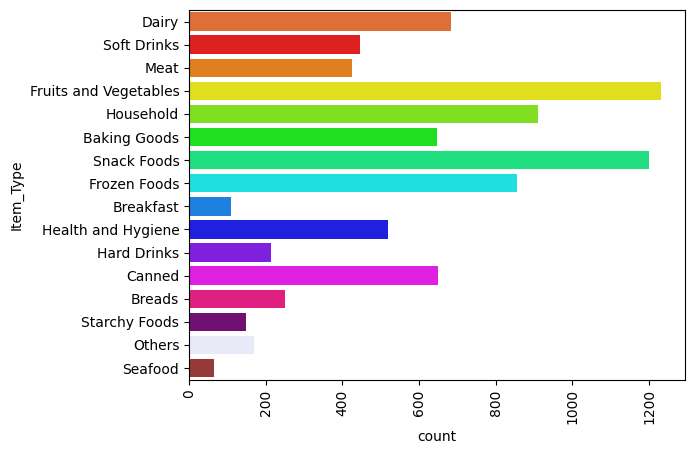

In [ ]:
sns.countplot(train['Item_Type'],palette=["#FA661C","#ff0000","#ff8000","#ffff00","#80ff00","#00ff00","#00ff80","#00ffff","#0080ff","#0000ff","#8000ff","#ff00ff","#ff0080","#800080","#E6e6fa","#A52a2a"])
plt.xticks(rotation=90)

# Bivariate Analysis

In [ ]:
target_variable = "Item_Outlet_Sales"

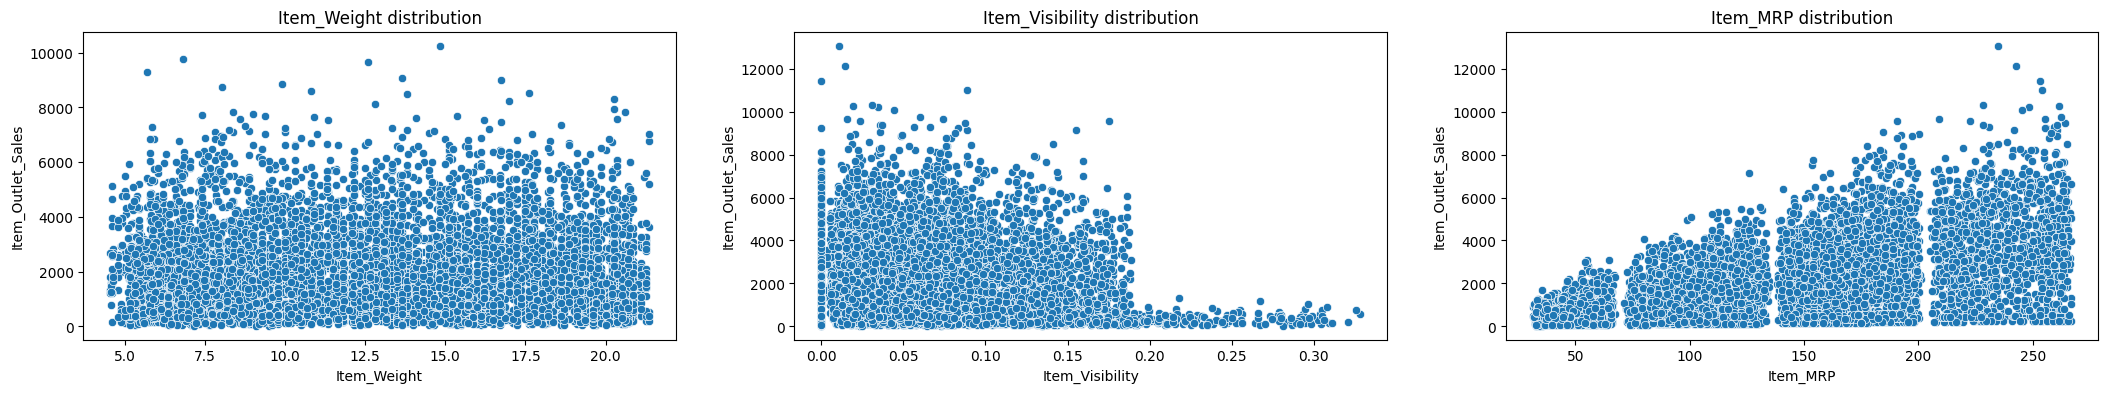

In [ ]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(26, 4))

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP']):
    sns.scatterplot(data=train,x=col, y=target_variable, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

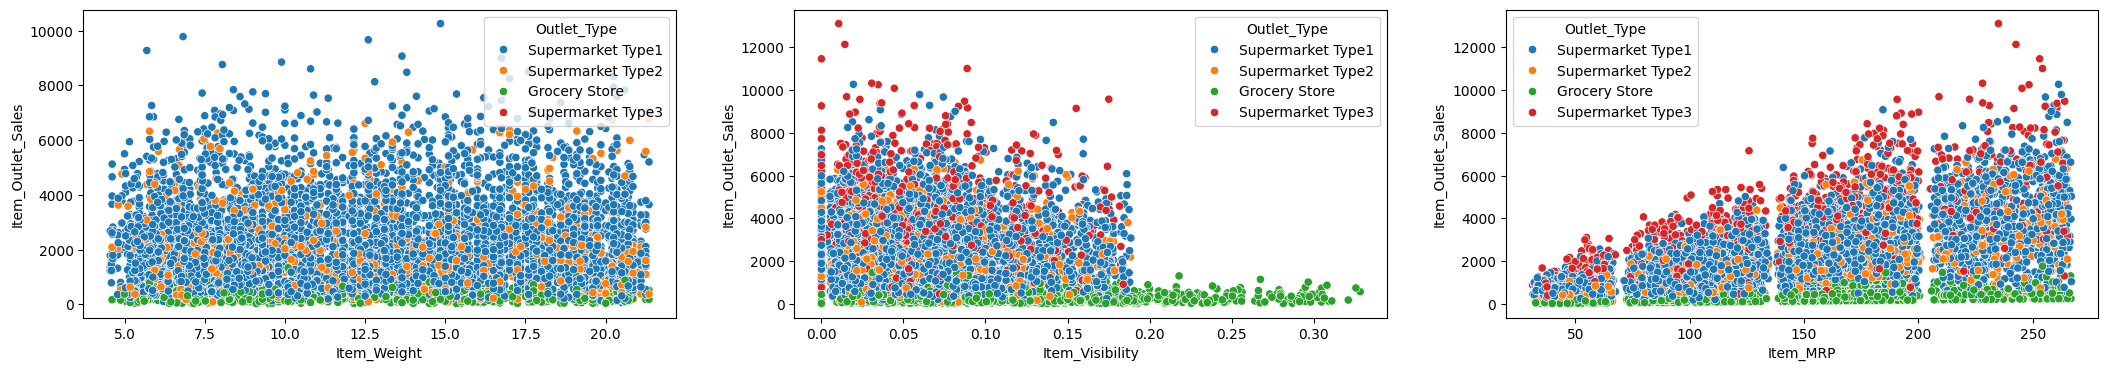

In [ ]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(26, 4))

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP']):
    sns.scatterplot(data=train,x=col, y=target_variable, ax=ax[index], hue='Outlet_Type')

<Axes: >

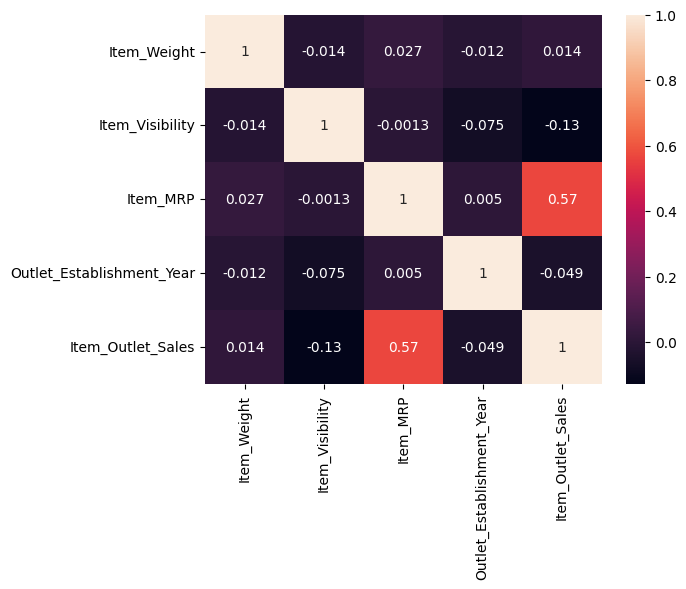

In [ ]:
sns.heatmap(train.corr(),annot=True)

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

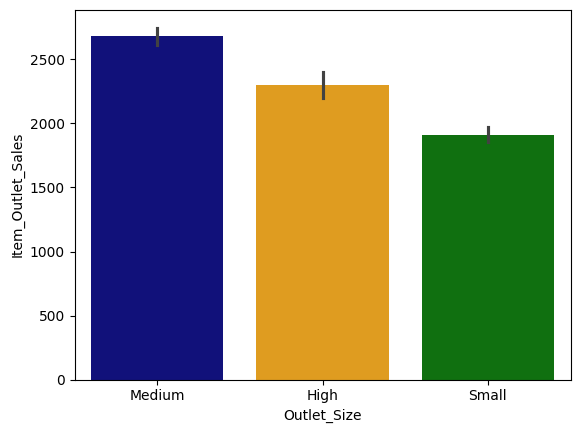

In [ ]:
sns.barplot(data = train ,x="Outlet_Size",y = target_variable,palette=["#00008b","#ffa500","#008000"])

## Missing Value Treatment :

In [ ]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#filling the object values with mode and float type with mean

# for train data
train['Outlet_Size'] = train.Outlet_Size.fillna(train.Outlet_Size.dropna().mode()[0])
train['Item_Weight'] = train.Item_Weight.fillna(train.Item_Weight.mean())

# for test data
test['Outlet_Size'] = test.Outlet_Size.fillna(test.Outlet_Size.dropna().mode()[0])
test['Item_Weight'] = test.Item_Weight.fillna(test.Item_Weight.mean())

In [ ]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Feature Engineering

In [ ]:
def detect_outliers(df, feature):
    Q1  = df[feature].quantile(0.25)
    Q3  = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

In [ ]:
upper, lower = detect_outliers(train, "Item_Visibility")
print("Upper limit: ", upper)
print("Lower limit: ", lower)

Upper limit:  0.195979015
Lower limit:  -0.07440424500000001


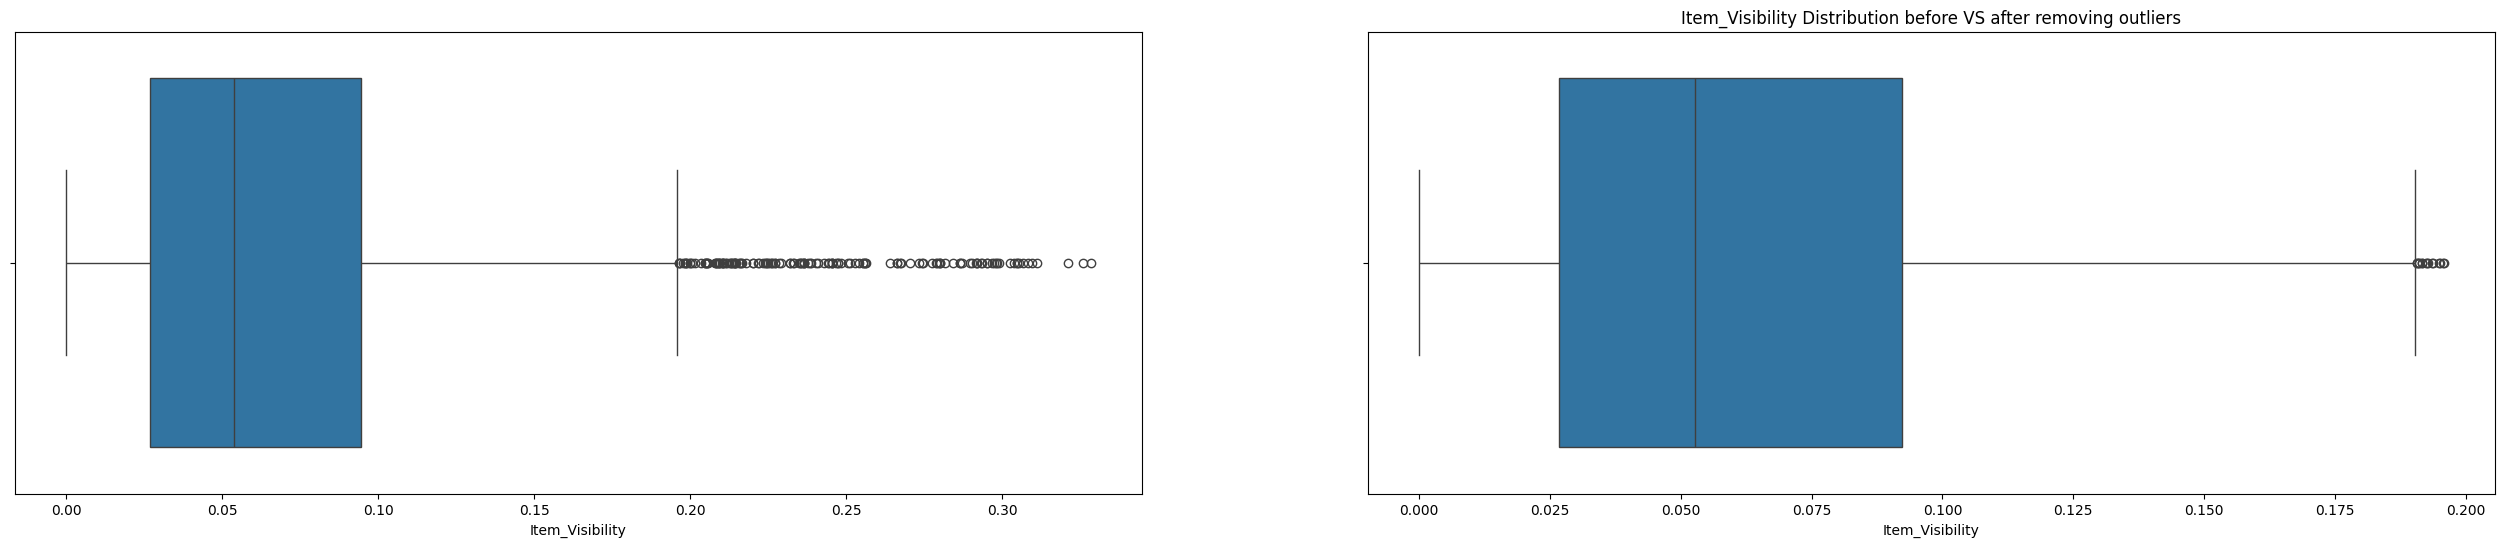

In [ ]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 6))
sns.boxplot(x=train['Item_Visibility'], ax=ax[0])

# removing outliers using the above function
train = train[(train['Item_Visibility'] > lower) & (train['Item_Visibility'] < upper)] #train
test = test[(test['Item_Visibility'] > lower) & (test['Item_Visibility'] < upper)]     #test

sns.boxplot(x=train['Item_Visibility'], ax=ax[1])
plt.title('Item_Visibility Distribution before VS after removing outliers')
plt.show()

In [ ]:
# detect outliers in the Item_Outlet_Sales feature
upper, lower = detect_outliers(train, "Item_Outlet_Sales")
print("Upper limit: ", upper)
print("Lower limit: ", lower)

Upper limit:  6499.2067
Lower limit:  -2499.7460999999994


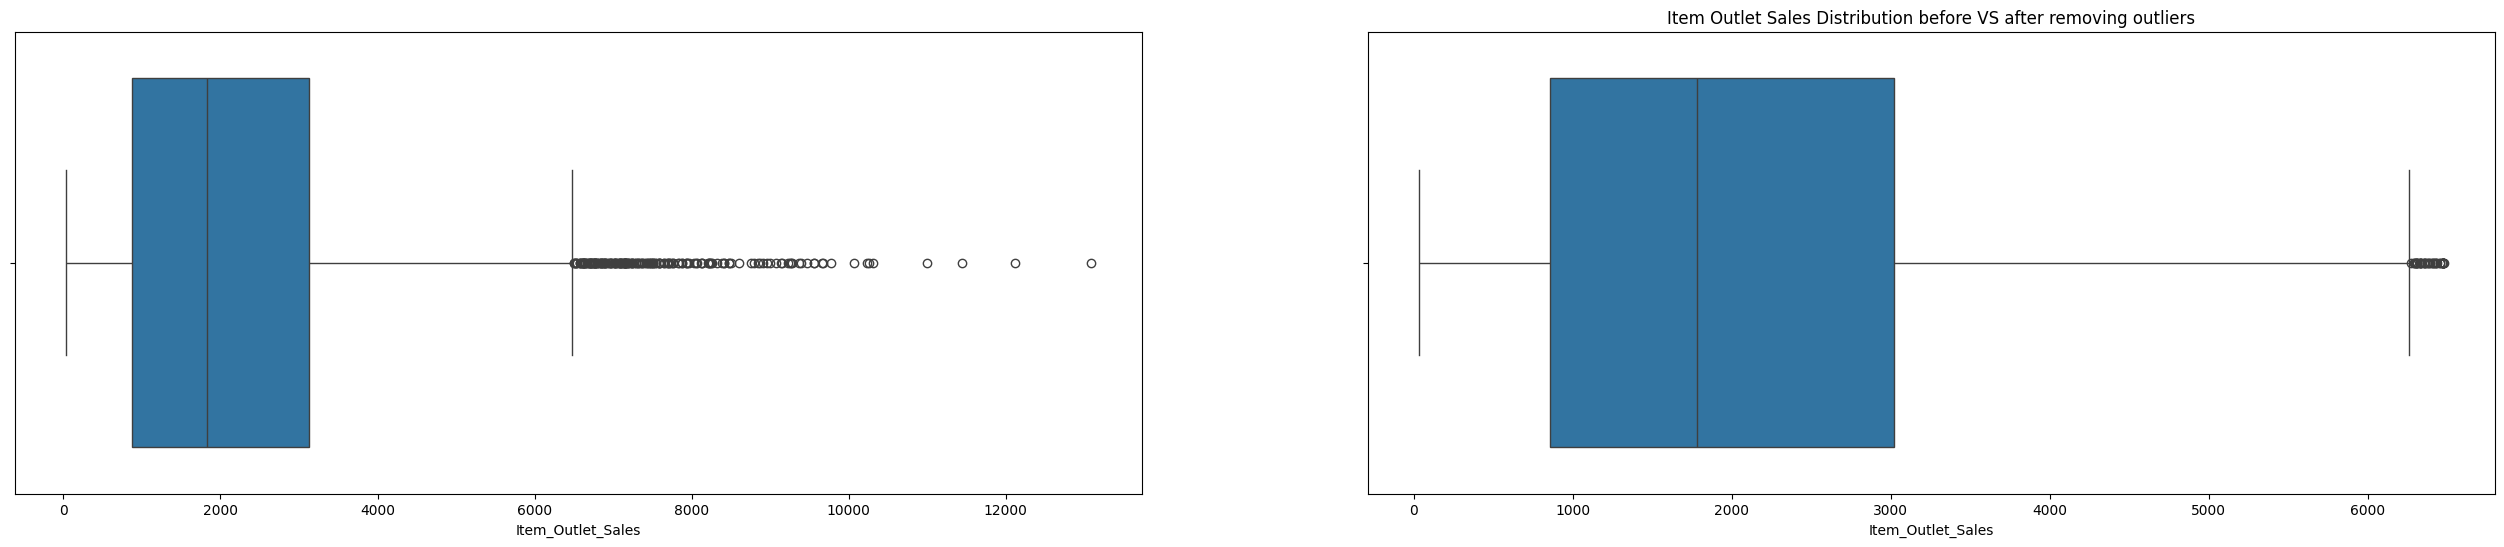

In [ ]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 6))
sns.boxplot(x=train['Item_Outlet_Sales'], ax=ax[0])

# removing outliers using the same function
train = train[(train['Item_Outlet_Sales'] > lower) & (train['Item_Outlet_Sales'] < upper)]

sns.boxplot(x=train['Item_Outlet_Sales'], ax=ax[1])
plt.title('Item Outlet Sales Distribution before VS after removing outliers')
plt.show()

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

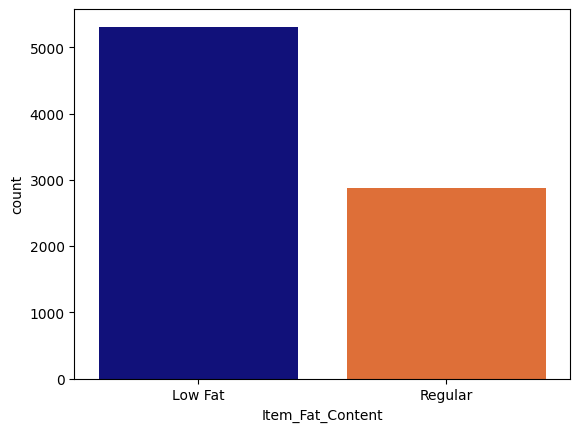

In [ ]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].map({'Low Fat' :'Low Fat',
                                                           'low fat' :"Low Fat",
                                                           'LF'      :"Low Fat",
                                                           'Regular' :'Regular',
                                                           'reg'     :"Regular"
                                                          })

test['Item_Fat_Content'] = test['Item_Fat_Content'].map({'Low Fat' :'Low Fat',
                                                           'low fat' :"Low Fat",
                                                           'LF'      :"Low Fat",
                                                           'Regular' :'Regular',
                                                           'reg'     :"Regular"
                                                          })

sns.countplot(x=train['Item_Fat_Content'],palette=["#00008b","#FA661C"])

<Axes: xlabel='Outlet_Age', ylabel='count'>

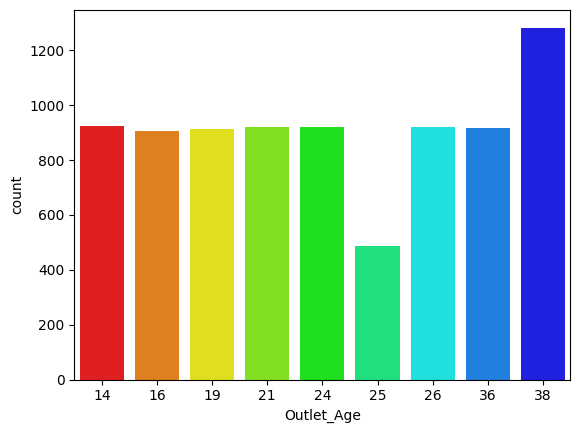

In [ ]:
# getting the amount of established years in new column and delete old column
train['Outlet_Age'] = 2023 - train['Outlet_Establishment_Year']
test['Outlet_Age'] = 2023 - test['Outlet_Establishment_Year']

del train['Outlet_Establishment_Year']
del test['Outlet_Establishment_Year']

sns.countplot(x=train['Outlet_Age'],palette=["#ff0000","#ff7f00","#ffff00","#7fff00","#00ff00","#00ff7f","#00ffff","#007fff","#0000ff"])

# **Encoding Categorical Variables :**

## Label Encoding

In [ ]:
train['Outlet_Size'] = train['Outlet_Size'].map({'Small'  : 1,
                                                 'Medium' : 2,
                                                 'High'   : 3
                                                 }).astype(int)
test['Outlet_Size'] = test['Outlet_Size'].map({ 'Small' : 1,
                                                'Medium' : 2,
                                                'High' : 3}).astype(int)

<Axes: xlabel='Outlet_Size', ylabel='count'>

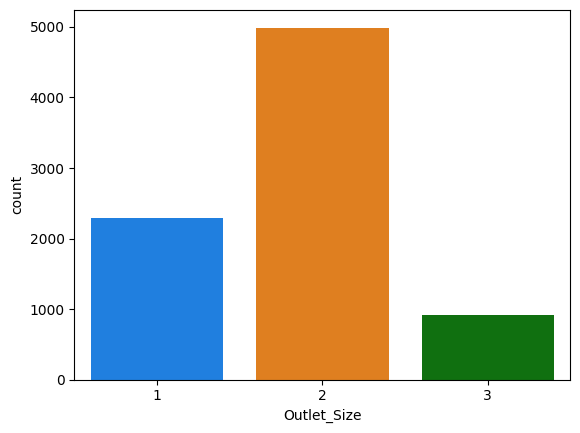

In [ ]:
sns.countplot(x = train['Outlet_Size'], palette = ["#007fff","#ff7f00","#008000"])

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

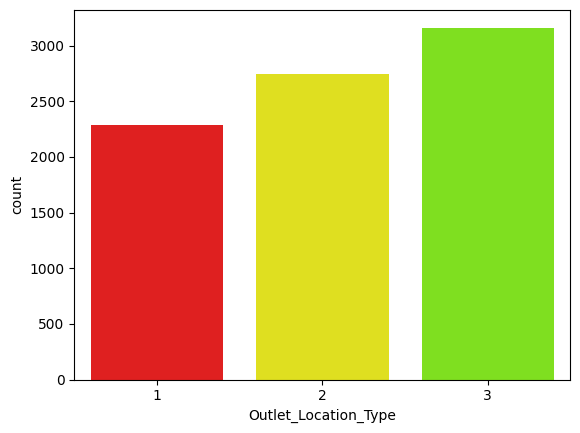

In [ ]:
train['Outlet_Location_Type'] = train['Outlet_Location_Type'].str[-1:].astype(int)
test['Outlet_Location_Type']  = test['Outlet_Location_Type'].str[-1:].astype(int)
sns.countplot(x=train['Outlet_Location_Type'],palette = ["#ff0000","#ffff00","#7fff00"])

<Axes: xlabel='Item_Identifier_Categories', ylabel='count'>

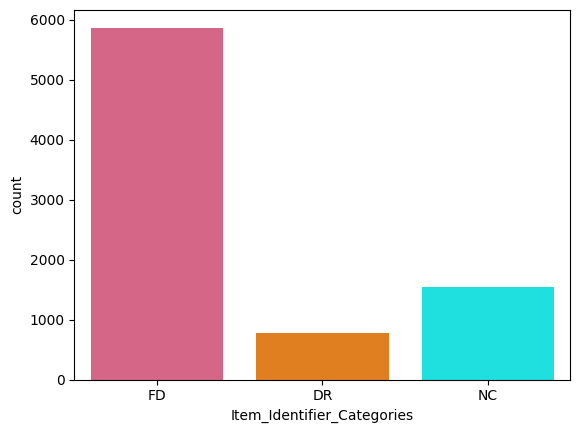

In [ ]:
train['Item_Identifier_Categories'] = train['Item_Identifier'].str[0:2] #.astype(int)
test['Item_Identifier_Categories']  = test['Item_Identifier'].str[0:2]

sns.countplot(x=train['Item_Identifier_Categories'],palette = ["#E75480","#ff7f00","#00ffff"])

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Categories
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,2,1,Supermarket Type1,3735.1380,24,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2,3,Supermarket Type2,443.4228,14,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,2,1,Supermarket Type1,2097.2700,24,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,2,3,Grocery Store,732.3800,25,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,3,3,Supermarket Type1,994.7052,36,NC


In [ ]:
#Label Encoder for Ordinate Data

encoding = LabelEncoder()
ordinal_features = ['Item_Fat_Content', 'Outlet_Type', 'Outlet_Location_Type']

for feature in ordinal_features:
    train[feature] = encoding.fit_transform(train[feature])
    test[feature]  = encoding.fit_transform(test[feature])


In [ ]:
train.shape

(8193, 13)

In [ ]:
test.shape

(5570, 12)

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Categories
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,2,0,1,3735.1380,24,FD
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2,2,2,443.4228,14,DR
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,2,0,1,2097.2700,24,FD
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,2,2,0,732.3800,25,FD
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,3,2,1,994.7052,36,NC


## One Hot Encoding :



In [ ]:
# One Hot Encoding for 'Item_Type' variable

train = pd.get_dummies(train, columns=['Item_Type', 'Item_Identifier_Categories', 'Outlet_Identifier'], drop_first=True)
test  = pd.get_dummies(test,  columns=['Item_Type', 'Item_Identifier_Categories', 'Outlet_Identifier'], drop_first=True)

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,...,Item_Identifier_Categories_NC,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,9.30,0,0.016047,249.8092,2,0,1,3735.1380,24,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,1,0.019278,48.2692,2,2,2,443.4228,14,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0,0.016760,141.6180,2,0,1,2097.2700,24,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,1,0.000000,182.0950,2,2,0,732.3800,25,...,0,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0,0.000000,53.8614,3,2,1,994.7052,36,...,1,1,0,0,0,0,0,0,0,0


In [ ]:
train.shape

(8193, 36)

## PreProcessing Data

In [ ]:
# Let's drop useless columns
train.drop(labels=['Item_Identifier'], axis=1, inplace=True)
test.drop(labels=['Item_Identifier'],  axis=1, inplace=True)

In [ ]:
X = train.drop('Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']

In [ ]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Type_Breads,Item_Type_Breakfast,...,Item_Identifier_Categories_NC,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0,0.016047,249.8092,2,0,1,24,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,1,0.019278,48.2692,2,2,2,14,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016760,141.6180,2,0,1,24,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,1,0.000000,182.0950,2,2,0,25,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,3,2,1,36,0,0,...,1,1,0,0,0,0,0,0,0,0


In [ ]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# **Modeling**

# Linear Regression

In [ ]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
linear_reg_predictions = linear_reg_model.predict(X_test)
linear_reg_predictions

array([2205.38841116, 1064.48892917, 3045.77696158, ..., 1573.4447412 ,
       2656.63601005, 2868.28005637])

In [ ]:
print('Training score  : {}'.format(linear_reg_model.score(X_train, y_train)))
print('Test score      : {}'.format(linear_reg_model.score(X_test, y_test)))

Training score  : 0.5516657749034781
Test score      : 0.5471728591811283


In [ ]:
# Evaluation
lin_reg_mse  = mean_squared_error(y_test , linear_reg_predictions)
lin_reg_rmse = math.sqrt(lin_reg_mse)
lin_reg_r2   = r2_score(y_test, linear_reg_predictions)

print('RMSE  \t  :{}'.format(lin_reg_rmse))
print('R2 Score  :{}'.format(lin_reg_r2))

RMSE  	  :1021.5214420862889
R2 Score  :0.5471728591811283


In [ ]:
steps = [
    ('scaler', StandardScaler()),
    ('poly',   PolynomialFeatures(degree=2)),
    ('model',  LinearRegression())
       ]

lin_reg_pipeline = Pipeline(steps)

lin_reg_pipeline.fit(X_train, y_train)

print('Training score  : {}'.format(lin_reg_pipeline.score(X_train, y_train)))
print('Test score      : {}'.format(lin_reg_pipeline.score(X_test, y_test)))

Training score  : 0.5998222877451393
Test score      : 0.5662658968305581


The training score we got is the better one 0.5998 but the test score is 0.5662 ,which means the model starts to overfit the data. So,if we increase the degree of polynomial features the model will absolutely get overfit the data


## Regularized Linear Regression

Ridge Regression

In [ ]:
steps = [
            ('scaler', StandardScaler()),
            ('poly'  , PolynomialFeatures(degree=2)),
            ('model' , Ridge(alpha=7, fit_intercept=True))
       ]

ridge_pipeline = Pipeline(steps)
ridge_pipeline.fit(X_train, y_train)

print('Training Score  : {}'.format(ridge_pipeline.score(X_train, y_train)))
print('Test Score      : {}'.format(ridge_pipeline.score(X_test, y_test)))

Training Score  : 0.5998213122987628
Test Score      : 0.5662904189776015


In [ ]:
# Predictions for Ridge on the test data
ridge_predictions = ridge_pipeline.predict(X_test)

In [ ]:
# Evaluation
ridge_mse  = mean_squared_error(y_test , ridge_predictions)
ridge_rmse = math.sqrt(ridge_mse)
ridge_r2   = r2_score(y_test, ridge_predictions)

print('Ridge RMSE  \t : {}'.format(ridge_rmse))
print('Ridge R2 Score : {}'.format(ridge_r2))

Ridge RMSE  	 : 999.7255019674704
Ridge R2 Score : 0.5662904189776015


From the above results ,we can say that Ridge regression gives better results than Linear regression.

 Lasso Regression

In [ ]:
steps = [
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2)),
            ('model', Lasso(alpha=0.2, fit_intercept=True))
        ]

lasso_pipeline = Pipeline(steps)

lasso_pipeline.fit(X_train, y_train)

print('Training score  : {}'    .format(lasso_pipeline.score(X_train, y_train)))
print('Test score      : {}'    .format(lasso_pipeline.score(X_test, y_test)))

Training score  : 0.5997864842164852
Test score      : 0.566810150811661


In [ ]:
# Predictions for Lasso on the testset
lasso_predictions = lasso_pipeline.predict(X_test)

In [ ]:
# Evaluation
lasso_mse  = mean_squared_error(y_test , lasso_predictions)
lasso_rmse = math.sqrt(lasso_mse)
lasso_r2   = r2_score(y_test, lasso_predictions)

print('Lasso RMSE  \t    : {}'.format(lasso_rmse))
print('Lasso R2 Score      : {}'.format(lasso_r2))

Lasso RMSE  	    : 999.1263165378849
Lasso R2 Score      : 0.566810150811661


## Random Forest :

In [ ]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Predictions for XGBoost on the test data
rand_forest_predictions = random_forest_model.predict(X_test)

In [ ]:
print('Training score  : {}'.format(random_forest_model.score(X_train, y_train)))
print('Test score      : {}'.format(random_forest_model.score(X_test, y_test)))

Training score  : 0.9348356278776777
Test score      : 0.5201249874923226


In [ ]:
# Evaluation
random_forest_mse = mean_squared_error(y_test , rand_forest_predictions)
random_forest_rmse = math.sqrt(random_forest_mse)
random_forest_r2 = r2_score(y_test, rand_forest_predictions)

print('RandomForest RMSE  \t    : {}'.format(random_forest_rmse))
print('RandomForest R2 Score       :{}'.format(random_forest_r2))

RandomForest RMSE  	    : 1051.58729583064
RandomForest R2 Score       :0.5201249874923226


The difference between training and the test score is very huge.So Random Forest is overfitting the data.

## XG Boost

In [ ]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predictions for XGBoost on the test data
xgb_reg_predictions = xgb_reg.predict(X_test)

In [ ]:
print('XGBoost Training score  : {}'.format(xgb_reg.score(X_train, y_train)))
print('XGBoost Test score      : {}'.format(xgb_reg.score(X_test, y_test)))

XGBoost Training score  : 0.855475128396549
XGBoost Test score      : 0.4740711163368567


In [ ]:
# Evaluation
xgb_mse = mean_squared_error(y_test , xgb_reg_predictions)
xgb_rmse = math.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_reg_predictions)

print('XGBoost RMSE  \t   ----> {}'.format(xgb_rmse))
print('XGBoost R2 Score   ----> {}'.format(xgb_r2))

XGBoost RMSE  	   ----> 1100.892147232883
XGBoost R2 Score   ----> 0.4740711163368567


XG Boost also overfitting the data.

In [ ]:
# Final predictions on test data using Lasso
final_test_preds = lasso_pipeline.predict(test)
print(final_test_preds)

[1824.44246644 1446.72240395  652.29934975 ... 1873.3231161  3877.41152345
 1400.05394006]


In [ ]:
df = train.copy()

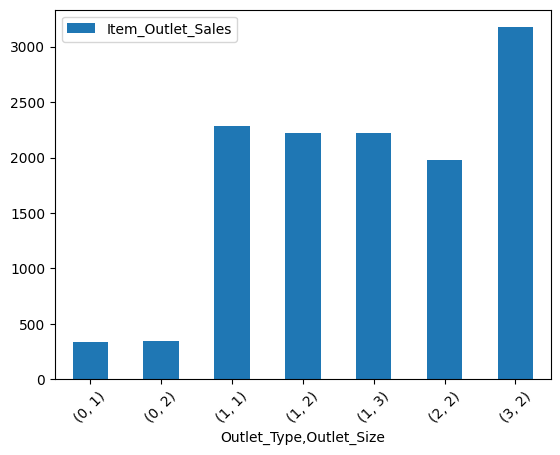

In [ ]:
df.groupby(['Outlet_Type','Outlet_Size']).agg({'Item_Outlet_Sales' : np.mean}).plot.bar()
X=plt.gca().xaxis

for item in X.get_ticklabels():
  item.set_rotation(45)

##Summary :         
 from the analysis of BigMart,the structured approach includes hypothesis generation, EDA, handling missing values, feature engineering, and applying various regression models to predict sales, ultimately aiming to identify key factors influencing sales.

 The summary encapsulates a comprehensive data science pipeline for understanding and predicting sales patterns in the retail domain.
